In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
#import utide

In [29]:
import pandas as pd
from utide import solve, reconstruct
import matplotlib.pyplot as plt
import numpy as np

In [30]:
dfu = pd.read_csv('../data/ul-boia-completo.csv', delimiter=';')
dfv = pd.read_csv('../data/vl-boia-completo.csv', delimiter=';')

In [31]:
#dfu.drop(['time'], axis=1, inplace=True)
#dfv.drop(['time'], axis=1, inplace=True)

In [32]:
#dfu.to_csv('corperpendicular.txt',sep=';', index=False)
#dfv.to_csv('corparalela.txt',sep=';', index=False)

In [33]:
u = dfu.iloc[0:3200, 1]
v = dfv.iloc[0:3200, 1]

In [34]:
dfu.head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,time
0,-5.928774,-2.978601,-3.320634,-3.470345,-2.958156,-4.705866,-4.566947,-4.462758,-4.844342,-4.948923e+00,...,-5.173874,-5.409318,-5.760821,-6.081331,-6.413693,-5.555062,-8.241056,-10.291037,-11.737973,2016-11-18 20:00:00
1,-11.402727,-8.750596,-6.980657,-8.503150,-7.380865,-6.373020,-6.549218,-7.249262,-5.218583,-6.987684e+00,...,-7.513953,-8.413696,-6.891079,-5.694019,-7.456039,-4.235960,-3.785530,4.594848,16.173534,2016-11-18 21:00:00
2,0.595127,-0.638758,-1.915496,-1.245912,-1.789890,-0.588146,0.605599,-1.165643,-1.095844,3.552714e-15,...,0.000000,1.777977,0.326360,0.715440,4.220607,3.949746,5.871076,7.969069,22.089146,2016-11-18 22:00:00


In [35]:
time = dfu.time.iloc[:3200]
time = pd.to_datetime(time)

In [36]:
u.isna().sum(), v.isna().sum()

(135, 135)

In [37]:
u.interpolate(method='linear', limit=12, inplace=True)
v.interpolate(method='linear', limit=12, inplace=True)

### Creataing a white noise

In [38]:
n = len(time) # comprimento
amp = 0.001 # amplitude
phase = np.pi/4 # fase em radianos
t = 500 # horas
t2 = 800 #
white_noise = [amp + np.sin((i*np.pi/2)/t) for i in range(n)]
white_noise2 = [amp + np.sin((i*np.pi/2)/t2 + phase) for i in range(n)]

white_noise = np.array(white_noise)
white_noise2 = np.array(white_noise2)

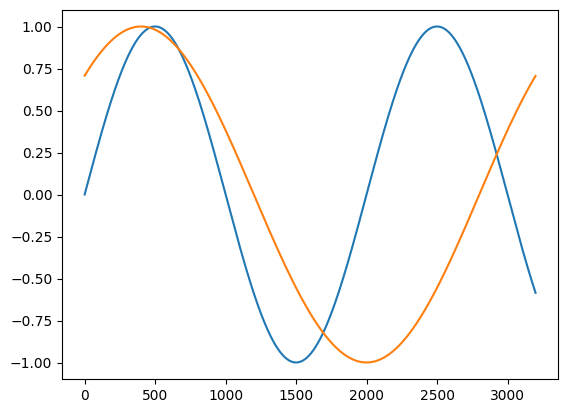

In [39]:
plt.plot(white_noise)
plt.plot(white_noise2)

In [40]:
def add_noise(vector, noise) -> np.asarray:
    from numpy import isnan
    vector[isnan(vector)] = 0
    vector = vector + noise
    return vector

In [41]:
u, v = add_noise(u, white_noise), add_noise(v, white_noise2)
u.isna().sum(), v.isna().sum()

(0, 0)

In [13]:
# computing current as a complex vector
c = v + u*1j

In [42]:
#from utide import solve
coef = solve(time, v, u,
             lat=-3,
             nodal=False,
             trend=False,
             method='robust',
             conf_int='linear',
             Rayleigh_min=0.95,)

solve: matrix prep ... solution ... done.


In [43]:
coef.keys()

dict_keys(['name', 'aux', 'nR', 'nNR', 'nI', 'rf', 'weights', 'Lsmaj', 'Lsmin', 'theta', 'g', 'umean', 'vmean', 'g_ci', 'Lsmaj_ci', 'Lsmin_ci', 'theta_ci', 'diagn', 'PE', 'SNR'])

In [121]:
#help(coef.weights)

In [44]:
coef.Lsmaj, coef.Lsmin

(array([7.62812465, 2.41448817, 2.23598808, 2.09535639, 1.96723373,
        1.69028917, 1.10087535, 1.0623413 , 0.95260941, 0.85081259,
        0.69853357, 0.69502501, 0.61323896, 0.64480138, 0.55898839,
        0.47505457, 0.52301226, 0.41525695, 0.46449646, 0.38521267,
        0.4395854 , 0.3901105 , 0.39472721, 0.33832785, 0.23910471,
        0.30150307, 0.28723221, 0.27456983, 0.26313632, 0.2530779 ,
        0.17050666, 0.12190844, 0.12894052, 0.10118603, 0.05900626]),
 array([ 4.99821264e+00, -9.88270413e-01,  1.14333656e+00,  6.06427941e-01,
        -8.54070480e-01, -1.78657701e-01,  1.54654598e-01,  2.14651217e-01,
         4.35519598e-01, -5.25969361e-01,  8.60983259e-02, -1.09982374e-01,
        -2.71434184e-01,  7.48352512e-02, -1.18780583e-01,  2.23447189e-01,
         3.82325876e-02,  2.17838432e-01, -9.17403985e-03, -2.50205477e-01,
         5.76513580e-02, -1.49208339e-01,  2.81350808e-02,  9.39773829e-02,
        -2.04050915e-01,  7.57554264e-02, -7.60326804e-02,  1.1338

In [51]:
coef.umean, coef.vmean

(34.315755254649396, 5.547051337810213)

In [52]:
coef.theta

array([ 77.68345703,  54.13363029,  77.54209539,  45.37324959,
        18.66873589, 171.96811338,   9.6700077 , 171.72397015,
       166.70960826, 148.48840209,   4.38779911, 169.00737756,
        12.37124455, 164.90932231, 133.13172139, 121.66862623,
        24.73486571,   5.4493977 , 148.38479284, 104.97905078,
        69.49578133,  10.90388   ,  41.02753053, 112.74906392,
        61.0536169 , 158.71846719,  79.51778718, 169.27426431,
        53.88090895,  18.2949884 ,  37.64487655,   3.60979924,
         4.11385145, 128.7579121 , 173.90189149])

In [53]:
coef.g

array([309.91452369, 215.12552785, 323.17926388, 290.01865159,
       325.29960531, 163.30454093,  87.40666961, 127.66703715,
        77.33175506, 301.36482422,  79.0418412 , 214.51891028,
       287.99300812, 174.16984662,  13.9713955 , 230.46000267,
       325.50208437, 225.87784897, 129.25368535, 222.00900388,
       163.74204419,  66.64536088, 187.66533811, 115.25230814,
       304.52151792, 189.00654173, 278.20967961, 146.04699312,
        63.11733548, 100.52454011,  76.77425718,   0.81596403,
       266.24169627, 341.96946202, 132.24587679])

In [54]:
coef.g_ci

array([   6.66133941,   23.36564758,   15.26839001,   14.97351478,
         22.192705  ,   21.60003935,   32.77771734,   34.80159382,
         47.50807127,   67.00507871,   51.65594567,   51.93335685,
         73.09780836,   54.04621854,   53.27874925,   65.90137466,
         62.53506866,  122.17770596,   65.69605022,  115.56051349,
         34.65294059,  107.53407529,   69.57690509,   72.03906327,
        558.5431042 ,  118.53237326,   48.9247559 ,  127.00689849,
         83.38857478,  142.90717447,  211.076539  ,  506.9750505 ,
        371.81745949, 1038.06362147,  971.13425461])

In [55]:
text = coef.diagn

In [56]:
print(pd.DataFrame(text))

    name         PE         SNR
0     M2  70.681127  682.503094
1     MM   5.784343   24.154145
2     S2   5.359791   51.842413
3     N2   4.043747   39.067881
4     K1   3.908769   36.129904
5    MSF   2.455170   10.271970
6     O1   1.050264    9.729501
7     L2   0.998254    9.635274
8    MU2   0.932390    9.019011
9    NO1   0.850282    7.852320
10  EPS2   0.420976    4.074158
11  ALP1   0.420801    3.896446
12    Q1   0.382204    3.539006
13   MO3   0.358094    3.940392
14   2Q1   0.277536    2.568151
15   MN4   0.234219    2.636476
16    M3   0.233708    2.572947
17   OO1   0.186872    1.729739
18   MS4   0.183429    2.064707
19   MK3   0.179308    1.976829
20    M4   0.167043    1.878229
21    J1   0.148253    1.369079
22   SN4   0.133085    1.495734
23  ETA2   0.104783    1.013511
24  UPS1   0.083970    0.778173
25   SK3   0.082131    0.906327
26  2SK5   0.075026    0.854096
27  2SM6   0.064069    0.731384
28    S4   0.059074    0.666241
29    M6   0.057802    0.658826
30  2MN6

In [57]:
coef.keys()

dict_keys(['name', 'aux', 'nR', 'nNR', 'nI', 'rf', 'weights', 'Lsmaj', 'Lsmin', 'theta', 'g', 'umean', 'vmean', 'g_ci', 'Lsmaj_ci', 'Lsmin_ci', 'theta_ci', 'diagn', 'PE', 'SNR'])

In [114]:
#help(utide._ut_constants)

In [77]:
help(solve)

Help on function solve in module utide._solve:

solve(t, u, v=None, lat=None, **opts)
    Calculate amplitude, phase, confidence intervals of tidal constituents.
    
    Parameters
    ----------
    t : array_like
        Time in days since `epoch`, or np.datetime64 array, or pandas datetime array.
    u : array_like
        Sea-surface height, velocity component, etc.
    v : {None, array_like}, optional
        If `u` is a velocity component, `v` is the orthogonal component.
    lat : float, required
        Latitude in degrees.
    epoch : {string, `datetime.date`, `datetime.datetime`}, if datenum is provided in t.
        Default `None` if `t` is `datetime`, `np.datetime64`, or `pd.datetime array.`
        Optional valid strings are
            - 'python' : if `t` is days since '0000-12-31'
            - 'matlab' : if `t` is days since '0000-00-00'
        Or, an arbitrary date in the form 'YYYY-MM-DD'.
    constit : {'auto', sequence}, optional
        List of strings with stand

In [58]:
help(coef)

Help on Bunch in module utide.utilities object:

class Bunch(builtins.dict)
 |  Bunch(*args, **kwargs)
 |  
 |  A dictionary that also provides access via attributes.
 |  
 |  Additional methods update_values and update_None provide
 |  control over whether new keys are added to the dictionary
 |  when updating, and whether an attempt to add a new key is
 |  ignored or raises a KeyError.
 |  
 |  The Bunch also prints differently than a normal
 |  dictionary, using str() instead of repr() for its
 |  keys and values, and in key-sorted order.  The printing
 |  format can be customized by subclassing with a different
 |  str_ftm class attribute.  Do not assign directly to this
 |  class attribute, because that would substitute an instance
 |  attribute which would then become part of the Bunch, and
 |  would be reported as such by the keys() method.
 |  
 |  To output a string representation with
 |  a particular format, without subclassing, use the
 |  formatted() method.
 |  
 |  Metho

In [59]:
coef.values()

dict_values([array(['M2', 'MM', 'S2', 'N2', 'K1', 'MSF', 'O1', 'L2', 'MU2', 'NO1',
       'EPS2', 'ALP1', 'Q1', 'MO3', '2Q1', 'MN4', 'M3', 'OO1', 'MS4',
       'MK3', 'M4', 'J1', 'SN4', 'ETA2', 'UPS1', 'SK3', '2SK5', '2SM6',
       'S4', 'M6', '2MN6', '2MK5', 'M8', '2MS6', '3MK7'], dtype=object), {'frq': array([0.0805114 , 0.00151215, 0.08333333, 0.07899925, 0.04178075,
       0.00282193, 0.03873065, 0.08202355, 0.07768947, 0.04026859,
       0.07617732, 0.03439657, 0.0372185 , 0.11924206, 0.03570635,
       0.15951065, 0.1207671 , 0.04483084, 0.16384473, 0.12229215,
       0.1610228 , 0.0432929 , 0.16233258, 0.08507364, 0.04634299,
       0.12511408, 0.20844741, 0.24717807, 0.16666667, 0.2415342 ,
       0.24002205, 0.20280355, 0.3220456 , 0.24435613, 0.28331495]), 'lind': array([ 47,   4,  56,  41,  20,   5,  12,  53,  39,  15,  34,   7,  10,
        67,   8,  78,  68,  27,  85,  71,  81,  24,  83,  60,  28,  73,
        98, 112,  88, 105, 102,  95, 124, 109, 119]), 'reftime': 736353